In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('SPY_23_13.csv')
print(df.shape)

df

(2516, 10)


,Unnamed: 0,Dates,Time,Open,High,Low,Close,Volume,Average,BarCount
0,0,2013-11-04,00:00:00,176.21,176.91,176.00,176.81,653478,176.527,172449
1,1,2013-11-05,00:00:00,176.66,176.75,175.57,176.37,743503,176.275,224818
2,2,2013-11-06,00:00:00,176.75,177.50,176.41,176.82,768845,177.020,216625
3,3,2013-11-07,00:00:00,176.93,177.95,174.76,175.25,1501226,175.952,391957
4,4,2013-11-08,00:00:00,175.45,177.31,174.15,177.19,1251518,176.194,350245
...,...,...,...,...,...,...,...,...,...,...
2511,2511,2023-10-26,00:00:00,414.88,417.33,411.60,414.83,941353,414.085,522392
2512,2512,2023-10-27,00:00:00,414.50,415.40,409.21,410.35,846893,411.545,493171
2513,2513,2023-10-30,00:00:00,412.42,416.68,412.22,415.18,690067,414.721,384580
2514,2514,2023-10-31,00:00:00,414.70,418.53,413.83,417.28,647901,416.930,336362


In [6]:
df_model = df[['Dates', 'Close']]
df_model

,Dates,Close
0,2013-11-04,176.81
1,2013-11-05,176.37
2,2013-11-06,176.82
3,2013-11-07,175.25
4,2013-11-08,177.19
...,...,...
2511,2023-10-26,414.83
2512,2023-10-27,410.35
2513,2023-10-30,415.18
2514,2023-10-31,417.28


In [7]:
df_model['Dates']

0       2013-11-04
1       2013-11-05
2       2013-11-06
3       2013-11-07
4       2013-11-08
           ...    
2511    2023-10-26
2512    2023-10-27
2513    2023-10-30
2514    2023-10-31
2515    2023-11-01
Name: Dates, Length: 2516, dtype: object

In [8]:
import datetime

In [9]:
def str_to_datetime(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day=day)

datetime_object = str_to_datetime('2023-10-27')
datetime_object

datetime.datetime(2023, 10, 27, 0, 0)

In [10]:
df_model

,Dates,Close
0,2013-11-04,176.81
1,2013-11-05,176.37
2,2013-11-06,176.82
3,2013-11-07,175.25
4,2013-11-08,177.19
...,...,...
2511,2023-10-26,414.83
2512,2023-10-27,410.35
2513,2023-10-30,415.18
2514,2023-10-31,417.28


In [11]:
df_model["Dates"] = df_model["Dates"].apply(str_to_datetime)

/var/folders/k8/9d6205fs311gsr3lccxy87h00000gp/T/ipykernel_42226/4228173962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["Dates"] = df_model["Dates"].apply(str_to_datetime)


In [12]:
df_model["Dates"]

0      2013-11-04
1      2013-11-05
2      2013-11-06
3      2013-11-07
4      2013-11-08
          ...    
2511   2023-10-26
2512   2023-10-27
2513   2023-10-30
2514   2023-10-31
2515   2023-11-01
Name: Dates, Length: 2516, dtype: datetime64[ns]

In [13]:
df_model.index =df_model.pop("Dates")

In [14]:
df_model

,Close
Dates,
2013-11-04,176.81
2013-11-05,176.37
2013-11-06,176.82
2013-11-07,175.25
2013-11-08,177.19
...,...
2023-10-26,414.83
2023-10-27,410.35
2023-10-30,415.18


In [15]:
import matplotlib.pyplot as plt
import numpy as np

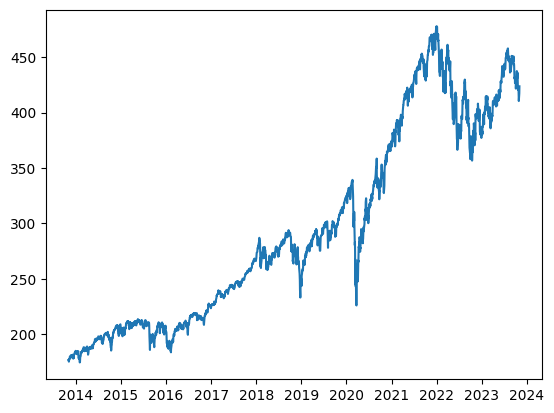

In [16]:
plt.plot(df_model.index, df_model.Close)
plt.show()

In [17]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []
    
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True
        
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates 
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y

    return ret_df 

In [18]:
windowed_df = df_to_windowed_df(df_model, 
                                '2013-11-07', 
                                '2023-11-01', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2013-11-07,176.81,176.37,176.82,175.25
1,2013-11-08,176.37,176.82,175.25,177.19
2,2013-11-11,176.82,175.25,177.19,177.36
3,2013-11-12,175.25,177.19,177.36,177.10
4,2013-11-13,177.19,177.36,177.10,178.80
...,...,...,...,...,...
2508,2023-10-26,421.81,423.24,415.72,414.83
2509,2023-10-27,423.24,415.72,414.83,410.35
2510,2023-10-30,415.72,414.83,410.35,415.18
2511,2023-10-31,414.83,410.35,415.18,417.28


In [19]:
df_model

,Close
Dates,
2013-11-04,176.81
2013-11-05,176.37
2013-11-06,176.82
2013-11-07,175.25
2013-11-08,177.19
...,...
2023-10-26,414.83
2023-10-27,410.35
2023-10-30,415.18


In [20]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates)),middle_matrix.shape[1] ,1)
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)
    
dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2513,), (2513, 3, 1), (2513,))

In [21]:
X

array([[[176.81],
        [176.37],
        [176.82]],

       [[176.37],
        [176.82],
        [175.25]],

       [[176.82],
        [175.25],
        [177.19]],

       ...,

       [[415.72],
        [414.83],
        [410.35]],

       [[414.83],
        [410.35],
        [415.18]],

       [[410.35],
        [415.18],
        [417.28]]], dtype=float32)

In [22]:
q_80 = int(len(dates)*0.8)
q_90 = int(len(dates)*0.9)

In [23]:
print(q_80, q_90, len(dates))

2010 2261 2513


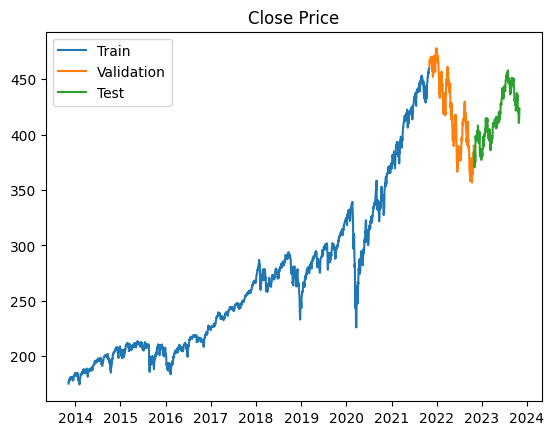

In [24]:


dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(["Train","Validation","Test"])
plt.title("Close Price")
plt.show()

In [25]:
# pip install --upgrade pip

In [26]:
# pip install protobuf==3.19.0

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

2024-01-15 18:36:13.369647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
63/63 [==============================] - 6s 13ms/step - loss: 73380.1641 - mean_absolute_error: 261.6995 - val_loss: 169526.4531 - val_mean_absolute_error: 410.3191
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 56781.5391 - mean_absolute_error: 226.7472 - val_loss: 114027.6484 - val_mean_absolute_error: 335.9507
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 17640.6914 - mean_absolute_error: 107.3592 - val_loss: 35780.1367 - val_mean_absolute_error: 186.0547
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 4973.7051 - mean_absolute_error: 55.2989 - val_loss: 24982.0039 - val_mean_absolute_error: 154.3317
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 3595.1782 - mean_absolute_error: 43.8736 - val_loss: 16398.3301 - val_mean_absolute_error: 123.9522
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 1016.7579 - mean_absolute_error: 14.7639 - val_loss: 

Epoch 50/100
63/63 [==============================] - 0s 3ms/step - loss: 11.4805 - mean_absolute_error: 2.3174 - val_loss: 99.4142 - val_mean_absolute_error: 8.2534
Epoch 51/100
63/63 [==============================] - 0s 3ms/step - loss: 11.8080 - mean_absolute_error: 2.3373 - val_loss: 67.1880 - val_mean_absolute_error: 6.7517
Epoch 52/100
63/63 [==============================] - 0s 3ms/step - loss: 13.5805 - mean_absolute_error: 2.5988 - val_loss: 65.8210 - val_mean_absolute_error: 6.6697
Epoch 53/100
63/63 [==============================] - 0s 3ms/step - loss: 13.0475 - mean_absolute_error: 2.5575 - val_loss: 71.7248 - val_mean_absolute_error: 6.9585
Epoch 54/100
63/63 [==============================] - 0s 3ms/step - loss: 12.7427 - mean_absolute_error: 2.5257 - val_loss: 69.5899 - val_mean_absolute_error: 6.8357
Epoch 55/100
63/63 [==============================] - 0s 3ms/step - loss: 11.8084 - mean_absolute_error: 2.3489 - val_loss: 68.9983 - val_mean_absolute_error: 6.8391
Epoc

63/63 [==============================] - 0s 3ms/step - loss: 12.2409 - mean_absolute_error: 2.4798 - val_loss: 74.3819 - val_mean_absolute_error: 7.0652
Epoch 100/100
63/63 [==============================] - 0s 3ms/step - loss: 14.1519 - mean_absolute_error: 2.7411 - val_loss: 61.7986 - val_mean_absolute_error: 6.4608


63/63 [==============================] - 1s 1ms/step


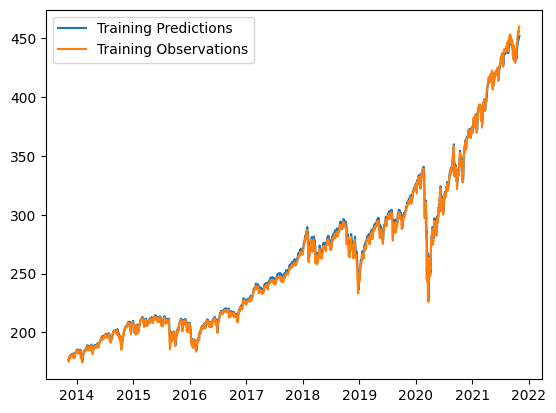

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [30]:
X_val

array([[[457.  ],
        [459.7 ],
        [459.84]],

       [[459.7 ],
        [459.84],
        [461.42]],

       [[459.84],
        [461.42],
        [465.46]],

       [[461.42],
        [465.46],
        [467.19]],

       [[465.46],
        [467.19],
        [467.79]],

       [[467.19],
        [467.79],
        [467.77]],

       [[467.79],
        [467.77],
        [466.48]],

       [[467.77],
        [466.48],
        [464.31]],

       [[466.48],
        [464.31],
        [465.  ]],

       [[464.31],
        [465.  ],
        [467.6 ]],

       [[465.  ],
        [467.6 ],
        [467.57]],

       [[467.6 ],
        [467.57],
        [469.35]],

       [[467.57],
        [469.35],
        [468.37]],

       [[469.35],
        [468.37],
        [470.1 ]],

       [[468.37],
        [470.1 ],
        [469.17]],

       [[470.1 ],
        [469.17],
        [468.11]],

       [[469.17],
        [468.11],
        [468.05]],

       [[468.11],
        [468.05],
        [470

8/8 [==============================] - 0s 2ms/step


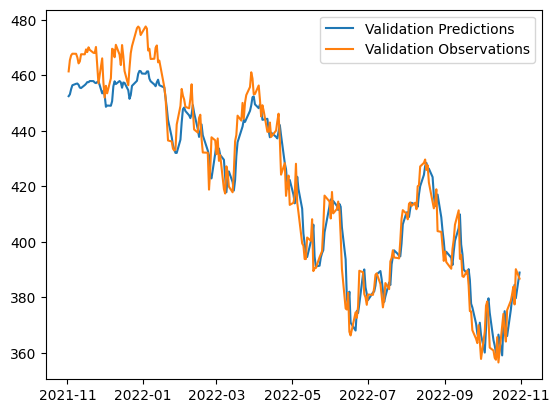

In [31]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

8/8 [==============================] - 0s 2ms/step


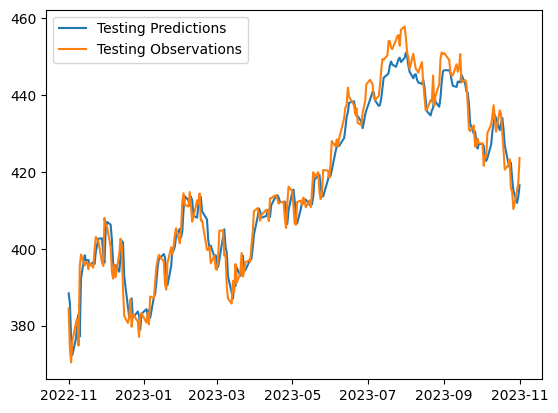

In [32]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [57]:
X_test.shape

(252, 3, 1)

In [72]:
X_test[0:3]

array([[[377.5 ],
        [390.2 ],
        [386.79]],

       [[476.56],
        [473.88],
        [474.6 ]],

       [[386.79],
        [384.49],
        [374.08]]], dtype=float32)

In [73]:
X_Cyrus = np.array([[[476.68],[476.35], [476.56]], [[476.35],[476.56],[473.88]], [[476.56],[473.88],[474.60]]], dtype='float32') 
X_Cyrus

array([[[476.68],
        [476.35],
        [476.56]],

       [[476.35],
        [476.56],
        [473.88]],

       [[476.56],
        [473.88],
        [474.6 ]]], dtype=float32)

In [ ]:
# np.array([[476.56],[473.88],[474.60]]) 

In [54]:
# X_Cyrus = X_test[1] #, dtype=float32

# X_Cyrus[0] =476.56
# X_Cyrus[1] =473.88
# X_Cyrus[2] =474.60

In [75]:
#[476.68],  [476.35],  [476.56] , [473.88],   [474.60]
#[M         , Tu        , Wed       , Thu    , Fri   ] --> [M]
#[M,          Tu,         Wed,     461.2024, 460.3911] --> 460.26425

[[476.68], [476.35], [476.56], [473.88], [474.6]]

In [74]:
test_predictions_Cyrus = model.predict(X_Cyrus).flatten()
test_predictions_Cyrus

1/1 [==============================] - 0s 20ms/step


array([461.2024 , 460.3911 , 460.26425], dtype=float32)

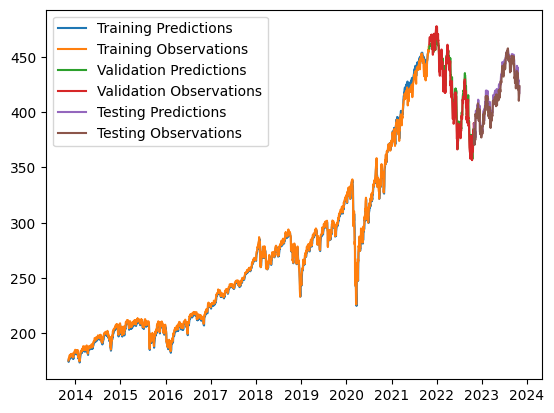

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [32]:
# from copy import deepcopy

# recursive_predictions = []
# recursive_dates = np.concatenate([dates_val, dates_test])

# for target_date in recursive_dates:
#     last_window = deepcopy(X_train[-1])
#     next_prediction = model.predict(np.array([last_window])).flatten()
#     recursive_predictions.append(next_prediction)
#     last_window[-1] = next_prediction

In [31]:
# plt.plot(dates_train, train_predictions)
# plt.plot(dates_train, y_train)
# plt.plot(dates_val, val_predictions)
# plt.plot(dates_val, y_val)
# plt.plot(dates_test, test_predictions)
# plt.plot(dates_test, y_test)
# plt.plot(recursive_dates, recursive_predictions)
# plt.legend(['Training Predictions', 
#             'Training Observations',
#             'Validation Predictions', 
#             'Validation Observations',
#             'Testing Predictions', 
#             'Testing Observations',
#             'Recursive Predictions'])

https://www.youtube.com/watch?v=CbTU92pbDKw

https://www.youtube.com/watch?v=kGdbPnMCdOg

https://link.springer.com/article/10.1007/s12530-022-09481-x#Sec9